<a href="https://colab.research.google.com/github/maortiz1/-MIAD_ML_and_NLP_maortiz1/blob/main/competencia_car_prices/competencia_ml_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lectura Archivos

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import xgboost as xg
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

import joblib
import werkzeug
from werkzeug.utils import cached_property
from flask import Flask



In [242]:
df_train=pd.read_csv('https://raw.githubusercontent.com/maortiz1/-MIAD_ML_and_NLP_maortiz1/main/competencia_car_prices/dataTrain_carListings.csv')
df_train.State = df_train.State.str.replace(' ', '')
df_train['car_age']=2022-df_train['Year']
df_train['mileage_by_year']=df_train['Mileage']/(df_train['car_age'])

In [243]:
df_train.head()

,Price,Year,Mileage,State,Make,Model,car_age,mileage_by_year
0,34995,2017,9913,FL,Jeep,Wrangler,5,1982.600000
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD,7,2939.714286
2,18430,2012,83716,TX,BMW,X5AWD,10,8371.600000
3,24681,2014,28729,OH,Cadillac,SRXLuxury,8,3591.125000
4,26998,2013,64032,CO,Jeep,Wrangler,9,7114.666667


In [244]:
val=df_train.groupby('Make',as_index=False).mileage_by_year.mean()
print(val)

             Make  mileage_by_year
0           Acura      6367.837743
1            Audi      6380.310735
2             BMW      5122.626832
3         Bentley      2990.917296
4           Buick      5469.864615
5        Cadillac      5589.120291
6       Chevrolet      5860.047486
7        Chrysler      6080.887072
8           Dodge      6512.428456
9            FIAT      5181.995759
10           Ford      6163.215075
11   Freightliner      8490.364796
12            GMC      6175.418602
13          Honda      5612.861302
14        Hyundai      5953.319693
15       INFINITI      6517.927974
16         Jaguar      5668.355477
17           Jeep      5529.975510
18            Kia      5447.488940
19           Land      5328.622014
20          Lexus      5349.330250
21        Lincoln      6018.946372
22           MINI      4779.383531
23          Mazda      6124.438217
24  Mercedes-Benz      4326.234070
25        Mercury      5702.379579
26     Mitsubishi      5523.088691
27         Nissan   

In [245]:
df_train.iloc

In [247]:

for k in df_train.index:
  c=df_train.iloc[k]
  df_train.at[k,'make_avg_mileage_year']=val[val['Make']==c['Make']]['mileage_by_year']


In [248]:
print(df_train)

        Price  Year  Mileage State        Make           Model  car_age  \
0       34995  2017     9913    FL        Jeep        Wrangler        5   
1       37895  2015    20578    OH   Chevrolet        Tahoe4WD        7   
2       18430  2012    83716    TX         BMW           X5AWD       10   
3       24681  2014    28729    OH    Cadillac       SRXLuxury        8   
4       26998  2013    64032    CO        Jeep        Wrangler        9   
...       ...   ...      ...   ...         ...             ...      ...   
399995  29900  2015    25287    TX       Lexus            RXRX        7   
399996  17688  2015    17677    MI   Chevrolet      EquinoxFWD        7   
399997  24907  2014    66688    NC       Buick  EnclaveLeather        8   
399998  11498  2014    37872    IN  Volkswagen           Jetta        8   
399999  16900  2014    78606    CO      Nissan     PathfinderS        8   

        mileage_by_year  make_avg_mileage_year  
0           1982.600000            5529.975510  
1

In [249]:
df_train.head(10)

,Price,Year,Mileage,State,Make,Model,car_age,mileage_by_year,make_avg_mileage_year
0,34995,2017,9913,FL,Jeep,Wrangler,5,1982.600000,5529.975510
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD,7,2939.714286,5860.047486
2,18430,2012,83716,TX,BMW,X5AWD,10,8371.600000,5122.626832
3,24681,2014,28729,OH,Cadillac,SRXLuxury,8,3591.125000,5589.120291
4,26998,2013,64032,CO,Jeep,Wrangler,9,7114.666667,5529.975510
5,40495,2016,9987,ME,BMW,3,6,1664.500000,5122.626832
6,33995,2015,12961,WA,Mercedes-Benz,C-ClassC300,7,1851.571429,4326.234070
7,21995,2014,6480,CT,Toyota,CamryL,8,810.000000,5915.200717
8,28591,2014,29165,CA,Toyota,TacomaPreRunner,8,3645.625000,5915.200717
9,10895,2008,70005,CA,Buick,LaCrosse4dr,14,5000.357143,5469.864615


In [250]:
df_test=pd.read_csv('https://raw.githubusercontent.com/maortiz1/-MIAD_ML_and_NLP_maortiz1/main/competencia_car_prices/dataTest_carListings.csv')
df_test.State = df_test.State.str.replace(' ', '')
df_test['car_age']=2022-df_test['Year']
df_test['mileage_by_year']=df_test['Mileage']/(df_test['car_age'])

In [252]:
val_test=df_test.groupby('Make',as_index=False).mileage_by_year.mean()
for j in df_test.index:
  c=df_test.iloc[j]
  df_test.at[j,'make_avg_mileage_year']=val_test[val_test['Make']==c['Make']]['mileage_by_year']


In [253]:
df_test.head(10)

,ID,Year,Mileage,State,Make,Model,car_age,mileage_by_year,make_avg_mileage_year
0,0,2014,31909,MD,Nissan,MuranoAWD,8,3988.625000,6650.718995
1,1,2017,5362,FL,Jeep,Wrangler,5,1072.400000,5525.671323
2,2,2014,50300,OH,Ford,FlexLimited,8,6287.500000,6203.181461
3,3,2004,132160,WA,BMW,5,18,7342.222222,5147.905267
4,4,2015,25226,MA,Jeep,Grand,7,3603.714286,5525.671323
5,5,2017,25684,AZ,Chevrolet,CruzeSedan,5,5136.800000,5879.912406
6,6,2016,56126,AZ,Kia,SorentoEX,6,9354.333333,5399.867630
7,7,2015,28767,FL,Lexus,IS,7,4109.571429,5425.111982
8,8,2015,58981,TX,Chevrolet,Suburban4WD,7,8425.857143,5879.912406
9,9,2016,20807,NJ,Hyundai,ElantraLimited,6,3467.833333,5933.319089


Text(0.5, 0, 'Continuous Variable')

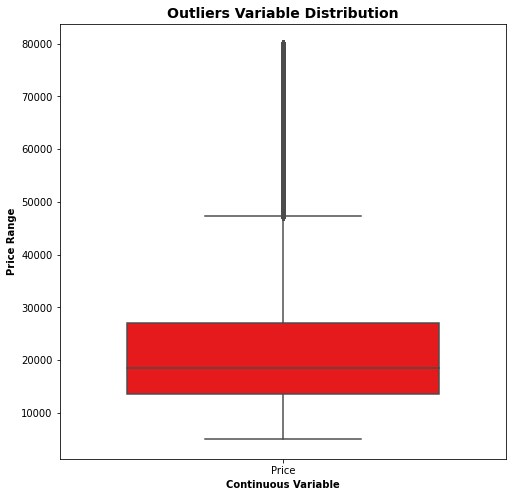

In [254]:
outliers = ['Price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df_train[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')


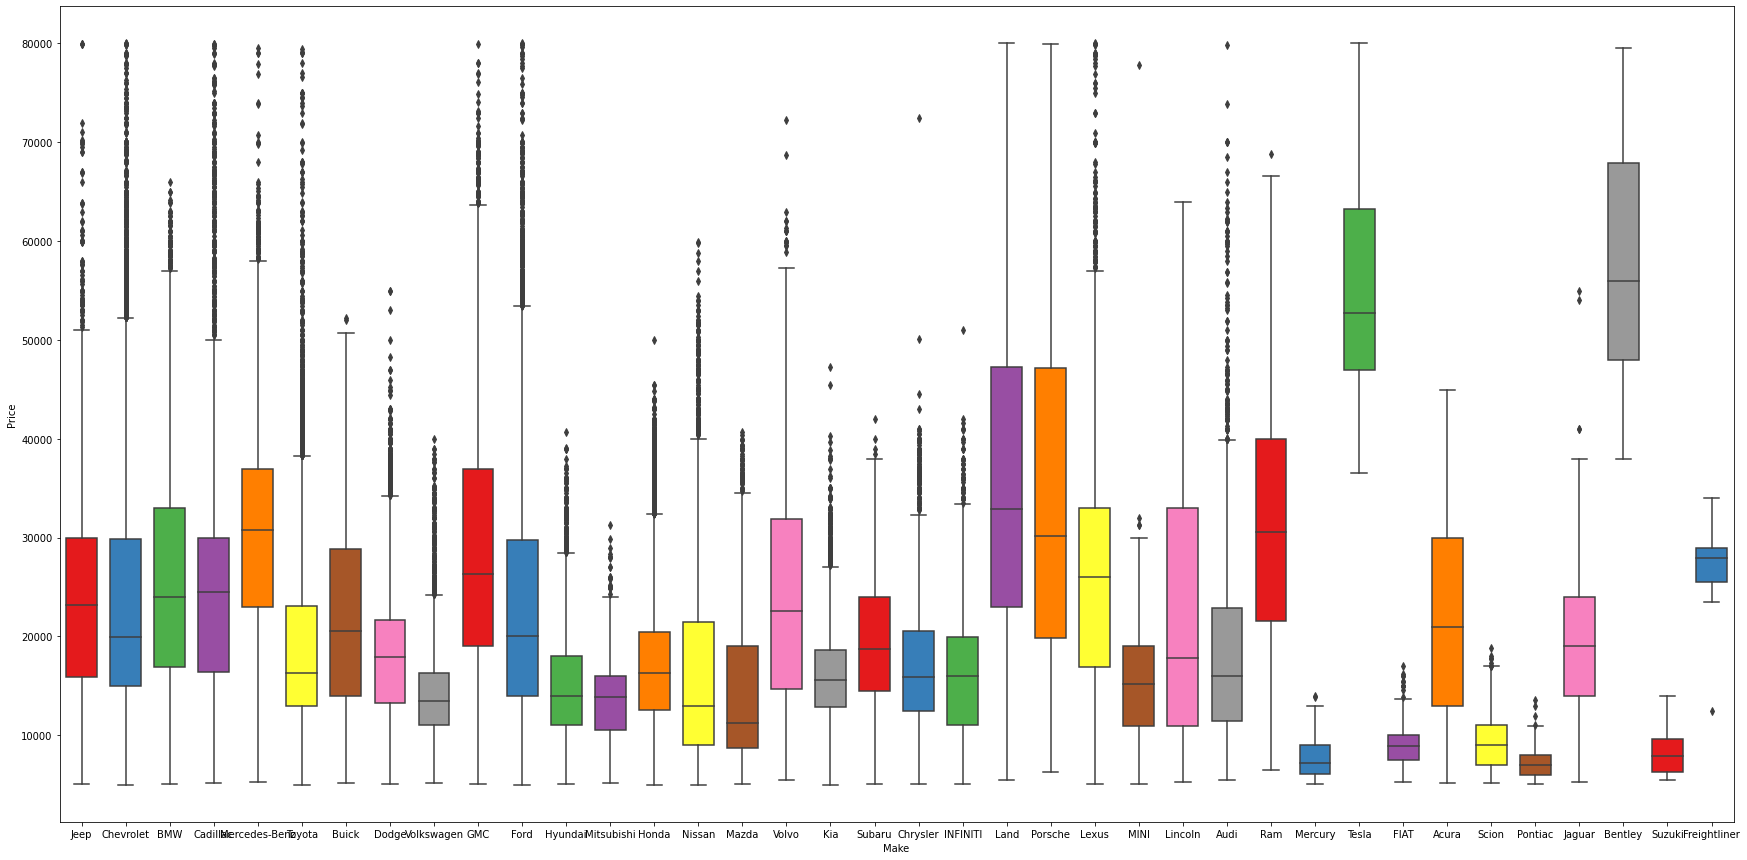

In [255]:
plt.figure(figsize=(30,15))
sns.boxplot(x=df_train['Make'],y=df_train['Price'],orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)

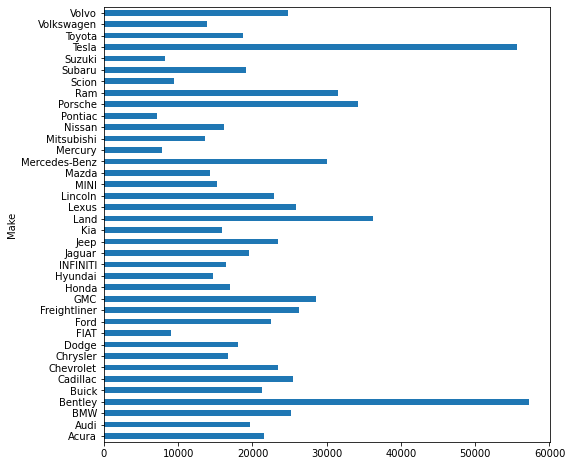

In [256]:
df_train.groupby('Make').Price.mean().plot.barh()

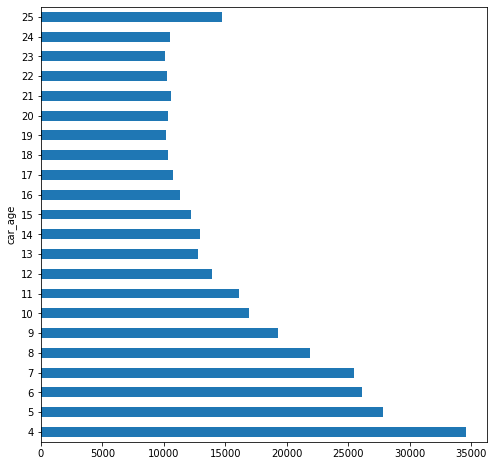

In [257]:
df_train.groupby('car_age').Price.mean().plot.barh()

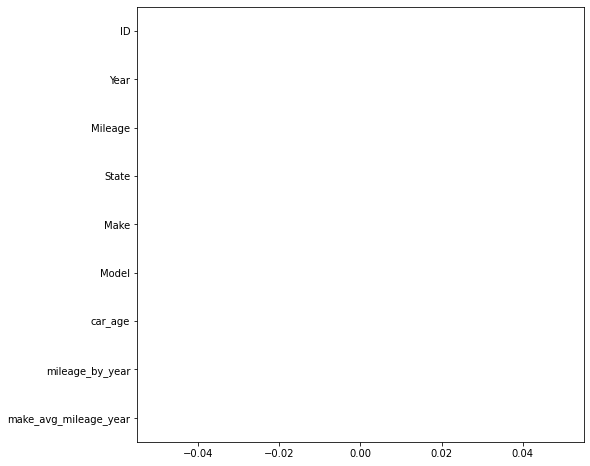

In [258]:
sns.barplot(x=df_train.isna().sum().values,y=df_train.isna().sum().index,)
sns.barplot(x=df_test.isna().sum().values,y=df_test.isna().sum().index,)

In [259]:
X=df_train[['Mileage','State','Make','car_age','mileage_by_year','Model','Year','make_avg_mileage_year']]
Y=df_train[['Price']]

In [260]:
X_Test=df_test[['Mileage','State','Make','car_age','mileage_by_year','Model','Year','make_avg_mileage_year']]

In [261]:
df_train.to_csv('new_parameters_train.csv')
df_test.to_csv('new_parameters_test.csv')


In [262]:
from pandas.core.indexes.category import CategoricalIndex
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler


#numerical_columns_selector = selector(dtype_exclude=string)
#categorical_columns_selector = selector(dtype_include=string)
numerical=['Mileage','car_age','mileage_by_year','make_avg_mileage_year']
categorical=['State',	'Make','Model','Year']
numerical_columns =numerical
categorical_columns = categorical
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])
X_preprocesses=preprocessor.fit_transform(X)
X_test_preprocesses=preprocessor.transform(X_Test)

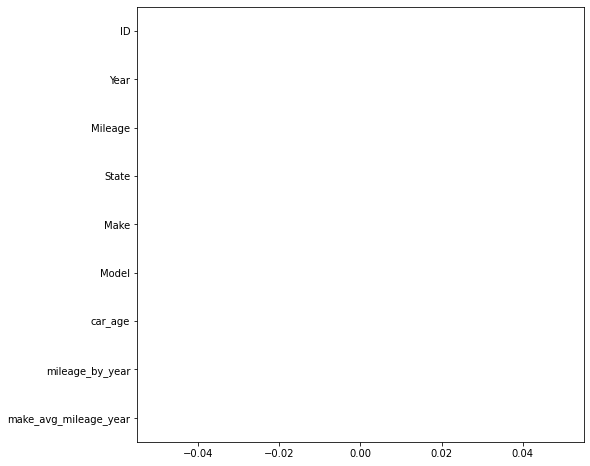

In [263]:
sns.barplot(x=df_train.isna().sum().values,y=df_train.isna().sum().index,)
sns.barplot(x=df_test.isna().sum().values,y=df_test.isna().sum().index,)

In [264]:
print(X_preprocesses[0])
print(X_test_preprocesses[0])


  (0, 9)	1.0
  (0, 68)	1.0
  (0, 578)	1.0
  (0, 634)	1.0
  (0, 636)	-1.1046694681523355
  (0, 637)	-1.1547699741728112
  (0, 638)	-1.251663829038321
  (0, 639)	-0.6626765715640054
  (0, 20)	1.0
  (0, 78)	1.0
  (0, 394)	1.0
  (0, 631)	1.0
  (0, 636)	-0.566619582985837
  (0, 637)	-0.2435590788860296
  (0, 638)	-0.5975509927191763
  (0, 639)	1.8876720762606343


In [265]:
XTrain, XTest, yTrain, yTest = train_test_split(X_preprocesses, Y, test_size=0.33, random_state=0)

In [266]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',learning_rate=0.5,gamma=0.01, colsample_bytree=0.5, max_depth=9,alpha=1,verbosity = 0 ) 

# Fitting the model
xgb_r.fit(XTrain, yTrain)
  
# Predict the model
pred = xgb_r.predict(XTest)
  
# RMSE Computation
rmse_base = np.sqrt(MSE(yTest, pred))
print("RMSE : % f" %(rmse_base))

RMSE :  3712.242930


In [267]:
pred_test=xgb_r.predict(X_test_preprocesses)

In [268]:
print(pred_test)

[21397.807 37773.37  22718.043 ... 24935.79  18079.152 22810.791]


In [269]:
df_test['Price']=pred_test

In [270]:
df_test.head(10)

,ID,Year,Mileage,State,Make,Model,car_age,mileage_by_year,make_avg_mileage_year,Price
0,0,2014,31909,MD,Nissan,MuranoAWD,8,3988.625000,6650.718995,21397.806641
1,1,2017,5362,FL,Jeep,Wrangler,5,1072.400000,5525.671323,37773.371094
2,2,2014,50300,OH,Ford,FlexLimited,8,6287.500000,6203.181461,22718.042969
3,3,2004,132160,WA,BMW,5,18,7342.222222,5147.905267,8936.437500
4,4,2015,25226,MA,Jeep,Grand,7,3603.714286,5525.671323,30159.052734
5,5,2017,25684,AZ,Chevrolet,CruzeSedan,5,5136.800000,5879.912406,15790.826172
6,6,2016,56126,AZ,Kia,SorentoEX,6,9354.333333,5399.867630,22034.400391
7,7,2015,28767,FL,Lexus,IS,7,4109.571429,5425.111982,28953.902344
8,8,2015,58981,TX,Chevrolet,Suburban4WD,7,8425.857143,5879.912406,46095.445312
9,9,2016,20807,NJ,Hyundai,ElantraLimited,6,3467.833333,5933.319089,17470.146484


In [271]:
df_test[['ID','Price']].to_csv('predictions_2.csv')

parameter search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))




In [272]:
xgb= xg.XGBRegressor(objective ='reg:linear',learning_rate=0.5,gamma=0.01, colsample_bytree=0.5, max_depth=9,alpha=1,verbosity = 0 ) 


In [275]:
params = {
        'min_child_weight': [1, 5,7, 10],
        'gamma': np.linspace(0.01, 5, num=10),
        'subsample': [0.5,0.6, 0.8, 1.0],
        'colsample_bytree': np.linspace(0.01, 0.7, num=10),
        'max_depth': range(1,20,2),
        'alpha': range(1, 15,1),
        'learning_rate':np.linspace(0.001, 0.5, num=13)
        }
params

{'alpha': range(1, 15),
 'colsample_bytree': array([0.01      , 0.08666667, 0.16333333, 0.24      , 0.31666667,
        0.39333333, 0.47      , 0.54666667, 0.62333333, 0.7       ]),
 'gamma': array([0.01      , 0.56444444, 1.11888889, 1.67333333, 2.22777778,
        2.78222222, 3.33666667, 3.89111111, 4.44555556, 5.        ]),
 'learning_rate': array([0.001     , 0.04258333, 0.08416667, 0.12575   , 0.16733333,
        0.20891667, 0.2505    , 0.29208333, 0.33366667, 0.37525   ,
        0.41683333, 0.45841667, 0.5       ]),
 'max_depth': range(1, 20, 2),
 'min_child_weight': [1, 5, 7, 10],
 'subsample': [0.5, 0.6, 0.8, 1.0]}

In [276]:
folds = 2
param_comb = 30

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='neg_mean_squared_error', n_jobs=4, cv=skf.split(X,Y), verbose=5, random_state=1001 )

# Here we go
 # timing starts from this point for "start_time" variable
random_search.fit(X_preprocesses, Y)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


Fitting 2 folds for each of 30 candidates, totalling 60 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fb5ffddd3d0>,
                   estimator=XGBRegressor(alpha=1, colsample_bytree=0.5,
                                          gamma=0.01, learning_rate=0.5,
                                          max_depth=9, verbosity=0),
                   n_iter=30, n_jobs=4,
                   param_distributions={'alpha': range(1, 15),
                                        'colsample_bytree': array([0.01      , 0.08666667, 0.16333333, 0.24      , 0.31666667,
       0.39333333, 0.47      , 0.54666667, 0.62333333, 0.7       ]),
                                        'gamma': array([0.01      , 0.56444444, 1.11888889, 1.67333333, 2.22777778,
       2.78222222, 3.33666667, 3.89111111, 4.44555556, 5.        ]),
                                        'learning_rate': array([0.001     , 0.04258333, 0.08416667, 0.12575   , 0.16733333,
       0.20891667, 0.2505    , 0.29208333, 0.33366667, 0.37525   ,
       0.41683333, 0.45841667, 0.

In [277]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([31.31623721, 71.69396925, 50.14348316, 25.30226207, 74.66581106,
       11.7713238 , 34.98147714, 55.7304585 , 43.65963531, 13.90797102,
       11.64188349, 84.01762104, 87.65806305, 37.7040242 , 17.29939795,
       14.44880176, 91.02542341, 40.97265279, 17.27622366, 52.01037014,
       13.91284823, 12.44603121, 14.41280651, 23.87908483, 32.11682415,
       17.14494765, 37.40290177, 94.15776563, 12.81955004, 44.88153613]), 'std_fit_time': array([0.14661074, 0.18643665, 0.07554841, 0.1294632 , 0.38103247,
       0.0453068 , 0.09175861, 0.29627132, 0.255404  , 0.20678699,
       0.03381145, 0.27444172, 0.12119567, 0.01273334, 0.03012156,
       0.01174903, 0.39693344, 0.10753143, 0.00943184, 0.10496914,
       0.04128909, 0.0358969 , 0.15630913, 0.06283665, 0.18863511,
       0.12561548, 0.3333267 , 0.14933205, 0.09782887, 0.19092095]), 'mean_score_time': array([2.67036831, 5.8221662 , 5.12213206, 4.03316879, 6.34777129,
       1.53384745, 3.492311

In [278]:
xgb_best= xg.XGBRegressor(alpha=6, colsample_bytree=0.22777777777777777,
             gamma=0.5644444444444445, learning_rate=0.5, max_depth=19,
             min_child_weight=10, subsample=0.8, verbosity=0)
xgb_best.fit(XTrain, yTrain)
pred_best=xgb_best.predict(XTest)
# RMSE Computation
rmse_base = np.sqrt(MSE(yTest, pred_best))
print("RMSE : % f" %(rmse_base))

RMSE :  3684.410987


In [ ]:
xgb_best_2= xg.XGBRegressor(alpha=1, colsample_bytree=0.44555555555555554, gamma=0.01,
             learning_rate=0.2782222222222222, max_depth=17,
             min_child_weight=10, subsample=0.5, verbosity=0)

xgb_best_2.fit(XTrain, yTrain)
pred_best=xgb_best_2.predict(XTest)
# RMSE Computation
rmse_base = np.sqrt(MSE(yTest, pred_best))
print("RMSE : % f" %(rmse_base))

In [ ]:
df_test['Price']=pred_best_2

In [ ]:
df_test.head(10)

In [ ]:
df_test[['ID','Price']].to_csv('predictions_2.csv')

In [ ]:
plt.barh( xgb.feature_importances_)

In [281]:

xgb_best_3= xg.XGBRegressor(alpha=5, colsample_bytree=0.7, gamma=3.336666666666667,
             learning_rate=0.41683333333333333, max_depth=15,
             min_child_weight=10, subsample=0.8, verbosity=0)

xgb_best_3.fit(XTrain, yTrain)
pred_best_3=xgb_best_3.predict(XTest)
# RMSE Computation
rmse_base = np.sqrt(MSE(yTest, pred_best))
print("RMSE : % f" %(rmse_base))

RMSE :  3634.826646


In [285]:
pred_best_3=xgb_best_3.predict(X_test_preprocesses)


In [286]:
df_test['Price']=pred_best_3
df_test.head(10)

,ID,Year,Mileage,State,Make,Model,car_age,mileage_by_year,make_avg_mileage_year,Price
0,0,2014,31909,MD,Nissan,MuranoAWD,8,3988.625000,6650.718995,21204.878906
1,1,2017,5362,FL,Jeep,Wrangler,5,1072.400000,5525.671323,34732.261719
2,2,2014,50300,OH,Ford,FlexLimited,8,6287.500000,6203.181461,24642.048828
3,3,2004,132160,WA,BMW,5,18,7342.222222,5147.905267,8699.434570
4,4,2015,25226,MA,Jeep,Grand,7,3603.714286,5525.671323,29731.923828
5,5,2017,25684,AZ,Chevrolet,CruzeSedan,5,5136.800000,5879.912406,16047.751953
6,6,2016,56126,AZ,Kia,SorentoEX,6,9354.333333,5399.867630,23125.154297
7,7,2015,28767,FL,Lexus,IS,7,4109.571429,5425.111982,28099.013672
8,8,2015,58981,TX,Chevrolet,Suburban4WD,7,8425.857143,5879.912406,44411.468750
9,9,2016,20807,NJ,Hyundai,ElantraLimited,6,3467.833333,5933.319089,15687.934570


In [287]:
df_test[['ID','Price']].to_csv('predictions_best_3.csv')